In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\Abel\Downloads\Zoo.csv")

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.shape

(101, 18)

In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:>

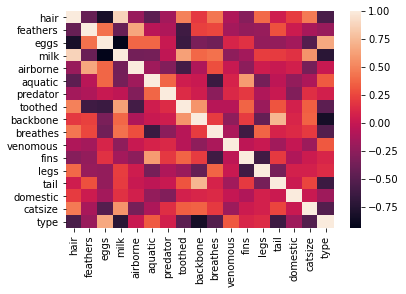

In [7]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='type', ylabel='count'>

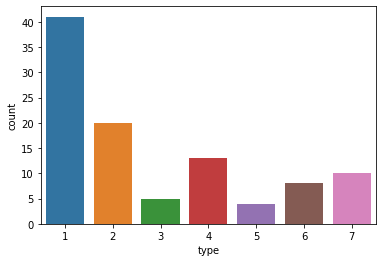

In [8]:
sns.countplot(x=df['type'])

In [9]:
#feature selection using univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
Y=df.iloc[:,-1].values
X=df.iloc[:,1:].values
sk=SelectKBest(score_func=chi2,k='all')
fit=sk.fit(X,Y)

In [11]:
print(fit.scores_) #important features scores

[ 48.83380601  81.          37.41971889  60.          49.21473577
  29.86897019   5.43081027  37.06005598  18.          17.33875
  17.58990385  62.55380201  81.17062123  16.88043902   4.19252057
  20.97600631 156.13986014]


In [12]:
#we will be using all features to build the model using cross validation
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

## Grid search for best k value

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':range(3,40)}

In [14]:
grid=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid)


In [15]:
grid=grid.fit(X,Y)

D:\Installation\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [16]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 3}


In [17]:
#building the model
kn=KNeighborsClassifier(n_neighbors=3)
model=kn.fit(x_train,y_train)

In [18]:
#predicting the model for test dataset
y_pred=model.predict(x_test)
y_pred

array([2, 4, 4, 1, 4, 1, 2, 6, 7, 2, 2, 4, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       5, 2, 1, 6, 2, 6, 1, 1, 1], dtype=int64)

In [19]:
#accuracy
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.97        31
   macro avg       0.84      0.86      0.85        31
weighted avg       0.94      0.97      0.95        31



D:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
